In [3]:
%%% Define the Chebyshev with j=1,...5 and the (first and second -order)derivative functions of it.
function ans=T0(x)
    ans=1;
endfunction
function ans=T1(x)
    ans=x;
endfunction
function ans=T2(x)
    ans=2*x.^2-1;
endfunction
function ans=T3(x)
    ans=4 * x.^3 - 3 * x;
endfunction
function ans=T4(x)
    ans=1-8*x.^2+8*x.^4;
endfunction
function ans=T5(x)
    ans=5*x-20*x.^3+16*x.^5;
endfunction
function ans=T6(x)
    ans=32*x^6-48*x^4+18*x^2-1;
endfunction
function ans=T7(x)
    ans=64*x^7-112*x^5+56*x^3-7*x;
endfunction
function ans=T8(x)
    ans=128*x^8-256*x^6+160*x^4-32*x^2+1;
endfunction
function ans=T9(x)
    ans=256*x^9-576*x^7+432*x^5-120*x^3+9*x;
endfunction
function ans=T10(x)
    ans=512*x^10-1280*x^8+1120*x^6-400*x^4+50*x^2-1;
endfunction
%First-order
function ans=dT0(x)
    ans=0;
endfunction
function ans=dT1(x)
    ans=1;
endfunction
function ans=dT2(x)
    ans=4*x;
endfunction
function ans=dT3(x)
    ans=12*x.^2-3;
endfunction
function ans=dT4(x)
    ans=32*x.^3-16*x;
endfunction
function ans=dT5(x)
    ans=80*x.^4-60*x.^2+5;
endfunction
function ans=dT6(x)
    ans=32*6*x^5-48*4*x^3+18*2*x;
endfunction
function ans=dT7(x)
    ans=64*7*x^6-112*5*x^4+56*3*x^2-7;
endfunction
function ans=dT8(x)
    ans=128*8*x^7-256*6*x^5+160*4*x^3-32*2*x;
endfunction
function ans=dT9(x)
    ans=256*9*x^8-576*7*x^6+432*5*x^4-120*3*x^2+9;
endfunction
function ans=dT10(x)
    ans=512*10*x^9-1280*8*x^7+1120*6*x^5-400*4*x^3+50*2*x;
endfunction
%Second-order
function ans=ddT0(x)
    ans=0;
endfunction
function ans=ddT1(x)
    ans=0;
endfunction
function ans=ddT2(x)
    ans=4;
endfunction
function ans=ddT3(x)
    ans=24*x;
endfunction
function ans=ddT4(x)
    ans=96*x.^2-16;
endfunction
function ans=ddT5(x)
    ans=320*x.^3-120*x;
endfunction
function ans=ddT6(x)
    ans=32*6*5*x^4-48*4*3*x^2+18*2;
endfunction
function ans=ddT7(x)
    ans=64*7*6*x^5-112*5*4*x^3+56*3*2*x;
endfunction
function ans=ddT8(x)
    ans=128*8*7*x^6-256*6*5*x^4+160*4*3*x^2-32*2;
endfunction
function ans=ddT9(x)
    ans=256*9*8*x^7-576*7*6*x^5+432*5*4*x^3-120*3*2*x;
endfunction
function ans=ddT10(x)
    ans=512*10*9*x^8-1280*8*7*x^6+1120*6*5*x^4-400*4*3*x^2+50*2;
endfunction
%%Define the function f
function rhs=f(n,h,t,y) 
% n: the number of ODE in ODE system
% h: step-size    
    rhs=zeros(1,n);
    rhs(1)=0;
    for i=2:n-1
        rhs(i)=1/h^2 * y(i-1)+(1-2/h^2)*y(i)+1/h^2 * y(i+1);
    endfor
    rhs(n)=0;
endfunction

 added to session magics.



In [4]:
%% RKC method with 10 stages.
function [h,t,y]=rkc10heat(a,b,y0,N)
%%Input   %a,b: starting, final time 
          %y0: initial value
          %N: number of time interval
%%Output  %h: stepsize
          %t: timegrid
          %y: numerical solution
    h = (b-a)/N;
    t = a:h:b;
    epsilon = 0.05;  %damping parameter
    s = 10; % number of stages
    w0 = 1+epsilon/s^2;
    w1 = dT10(w0)/ddT10(w0);
    %%Define coefficients
    b = a = mu = nu = c= mu_t = gamma_t = zeros(s+1,1);
    b(1) =  b(2) = b(3) = ddT2(w0) / (dT2(w0) ^2 );   
    b(4) = ddT3(w0) / (dT3(w0)^2);
    b(5) = ddT4(w0) / (dT4(w0)^2);
    b(6) = ddT5(w0) / (dT5(w0)^2);
    b(7) = ddT6(w0) / (dT6(w0)^2);
    b(8) = ddT7(w0) / (dT7(w0)^2);
    b(9) = ddT8(w0) / (dT8(w0)^2);
    b(10) = ddT9(w0) / (dT9(w0)^2);
    b(11) = ddT10(w0) / (dT10(w0)^2);
    % a_j+1=1-b_{j+1}*T_j(w0)    
    a(2) = 1 - b(2) * T1(w0);
    a(3) = 1 - b(3) * T2(w0);
    a(4) = 1 - b(4) * T3(w0);
    a(5) = 1 - b(5) * T4(w0);
    a(6) = 1 - b(6) * T5(w0);
    a(7) = 1 - b(7) * T6(w0);
    a(8) = 1 - b(8) * T7(w0);
    a(9) = 1 - b(9) * T8(w0);
    a(10) = 1 - b(10) * T9(w0);
    a(11) = 1 - b(11) * T10(w0);

    %mu_j+1=-2b_jw_0/b_{j-1}
    for i=3:s+1
        mu(i) = 2 * w0 * b(i) / b(i-1);
    endfor
    %nu_j=-b_j/(b_{j-2})
    for i = 3:s+1
        nu(i) = -b(i) / b(i-2); 
    endfor
    %c_j=w1*b_j*T'_j(w0)
    c(1)= 0;
    c(2) = w1 * b(2) * dT1(w0);
    c(3) = w1 * b(3) * dT2(w0);
    %c(2) = c(3)/dT2(w0);
    c(4) = w1 * b(4) * dT3(w0);
    c(5) = w1 * b(5) * dT4(w0);
    c(6) = w1 * b(6) * dT5(w0);
    c(7) = w1 * b(7) * dT6(w0);
    c(8) = w1 * b(8) * dT7(w0);
    c(9) = w1 * b(9) * dT8(w0);
    c(10) = w1 * b(10) * dT9(w0);
    c(11) = 1;
    %mu_t(i) = 2 * w1*b(i) / b(i-1)
    mu_t(2) = b(2)*w1;
    for i = 3:s+1
        mu_t(i) = 2 * w1 *b(i) / b(i-1);
    endfor    
    %gamma_t= -a_{j-1} *mu_t(j)
    gamma_t(2) = c(2);
    for i = 3:s+1
        gamma_t(i) = - a(i-1) * mu_t(i);
    endfor
    %%%% Main loop
    g = zeros(s+1,N+1);
    y=zeros(N+1,N+1);
    y(1,:) = y0;
    for i = 1:N
        g(1,:) = y(i,:);
        g(2,:) = g(1,:) + mu_t(2) * h * f(N+1,h,t(i)+c(1)*h,g(1,:));
        for j=3:s+1
            g(j,:) = (1-mu(j)-nu(j)) * g(1,:) + mu(j)* g(j-1,:) + nu(j)*g(j-2,:) + mu_t(j) * h * f(N+1,h,t(i)+c(j-1),g(j-1,:)) + gamma_t(j) * h * f(N+1,h,t(i)+c(1)*h,g(1,:));
        endfor
        y(i+1,:) = g(s+1,:);
    endfor      
endfunction

ans =  1


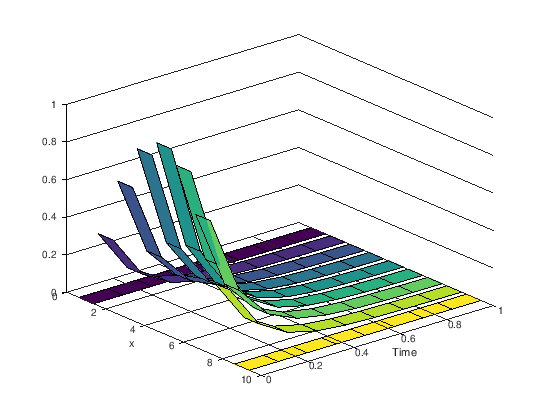

In [45]:
%%Plot the numerical solution.
a=0;
b=0.5;
N=8;
h=(b-a)/N;
y0=zeros(1,N+1);
for i=1:N+1
    y0(i)=sin(pi/(N) * (i-1));
endfor
[h,t,y] = rkc10heat(a,b,y0,N);
xgrid=linspace(0,1,9);
ribbon(xgrid',y);
view([50 30])
xlabel('x')
ylabel('Time')
y(1,5)


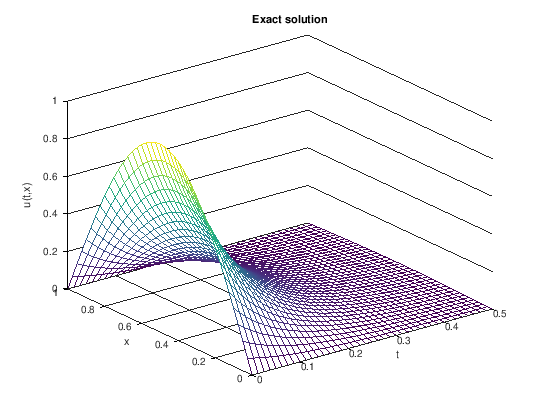

In [1]:
%%Exact solution
ty = linspace (0, 1, 41)';
tx = linspace (0, 0.5, 41)';
[xx, yy] = meshgrid (tx, ty);
tz =e.^((1-pi^2)*xx).*sin(pi*yy);
mesh (tx, ty, tz);
xlabel ("t");
ylabel ("x");
zlabel ("u(t,x)");
title ("Exact solution");